In [13]:
import pandas as pd
import numpy as np
import socket
from sklearn.preprocessing import normalize
# df = pd.read_excel("已知.xlsx")
# ase = df[:]
# df["成績"] = df["成績"].str.replace("M"," ").astype(float)
# cn = np.array([df["姓名"],df["成績"],df["速度"]])
# arr = ["姓名","成績","速度"]
# df = pd.DataFrame(cn.T,columns=arr)
# df.to_csv("林志成1.csv")

In [14]:
df = pd.read_csv("林志成1.csv")

x = pd.DataFrame(df["成績"])
y = pd.DataFrame(df["速度"])
df["成績"] = (normalize(x,axis=0))
df["速度"] = (normalize(y,axis=0))
normal = df[:]
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24 non-null     int64  
 1   姓名          24 non-null     object 
 2   成績          24 non-null     float64
 3   速度          24 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 900.0+ bytes


In [15]:
from sklearn.linear_model import LinearRegression
# 将“速度”提取出来，作为自变量 x1
x1 = pd.DataFrame(df['速度'])
# 将“成績”提取出来，作为因变量 x2
x2 = pd.DataFrame(df['成績'])
model = LinearRegression()#創建訓練模型
# 使用速度（x1）作为自變量，成績（x2）作為因變量
model.fit(x1, x2)
# 截距（w_0）
w_0 = model.intercept_
# 回歸係數（w_1）
w_1 = model.coef_
# R²分数，衡量模型的擬合
r2 = model.score(x1, x2) 
print(f"截距： {w_0}")
print(f"回歸係數： {w_1}")
print(f"模型契合： {r2}")
# 生成模型的预测值
ch1 = df["成績"]
ch2 = pd.DataFrame(df["速度"])
predictions = model.predict(ch2)


截距： [0.25420849]
回歸係數： [[-0.2463426]]
模型契合： 0.14593143670697928


In [16]:

# 提取自變量（x1）和因變量（x2）
x1 = df['速度'].values
x2 = df['成績'].values

# 初始化參數
w_0 = 0  # 截距
w_1 = 0  # 斜率
alpha = 0.01  # 學習率
epochs = 1000  # 迭代次數

n = len(x1)  # 數據量

# 梯度下降法
for _ in range(epochs):
    # 計算預測值
    y_pred = w_1 * x1 + w_0

    # 計算損失函數（MSE）
    loss = (1/n) * sum((x2 - y_pred) ** 2)

    # 計算梯度
    dw_0 = -(2/n) * sum(x2 - y_pred)
    dw_1 = -(2/n) * sum(x1 * (x2 - y_pred))

    # 更新参数
    w_0 = w_0 - alpha * dw_0
    w_1 = w_1 - alpha * dw_1


    if _ % 100 == 0:
        print(f'Epoch {_}: Loss = {loss}')


print(f"優化后的截距 w_0: {w_0}")
print(f"優化后的斜率 w_1: {w_1}")

predictions = w_1 * x1 + w_0

ss_total = sum((x2 - np.mean(x2)) ** 2)
ss_residual = sum((x2 - predictions) ** 2)
r2 = 1 - (ss_residual / ss_total)

print(f"模型的 R² 分数: {r2}")

Epoch 0: Loss = 0.041666666666666664
Epoch 100: Loss = 0.000671576157950455
Epoch 200: Loss = 6.306382230518781e-05
Epoch 300: Loss = 5.402670432269251e-05
Epoch 400: Loss = 5.388785506149361e-05
Epoch 500: Loss = 5.388108882937538e-05
Epoch 600: Loss = 5.387628538994495e-05
Epoch 700: Loss = 5.387151331194771e-05
Epoch 800: Loss = 5.386674392527089e-05
Epoch 900: Loss = 5.3861976803297866e-05
优化后的截距 w_0: 0.1959922021753823
优化后的斜率 w_1: 0.039246995490716814
模型的 R² 分数: -0.05020425358393821


In [17]:
df1 = pd.read_csv("林志成1.csv")
df2 = pd.read_csv("江育安.csv")


In [18]:
from sklearn.linear_model import LinearRegression
# 将“速度”提取出来，作为自变量 x1
x1 = pd.DataFrame(df2['速度'])
# 将“成績”提取出来，作为因变量 x2
x2 = pd.DataFrame(df2['成績'])
model = LinearRegression()#創建訓練模型
# 使用速度（x1）作为自變量，成績（x2）作為因變量
model.fit(x1, x2)
# 截距（w_0）
w_0 = model.intercept_
# 回歸係數（w_1）
w_1 = model.coef_
# R²分数，衡量模型的擬合
r2 = model.score(x1, x2) 
print(f"截距： {w_0}")
print(f"回歸係數： {w_1}")
print(f"模型契合： {r2}")
# 生成模型的预测值
ch1 = df["成績"]
ch2 = pd.DataFrame(df["速度"])
predictions = model.predict(ch2)

截距： [9.38378378]
回歸係數： [[-1.46114865]]
模型契合： 0.5735194922659453


In [19]:
result = pd.concat([df1, df2], ignore_index=True).reset_index(drop=True)
if 'Unnamed: 0' in result.columns:
    result = result.drop(columns=['Unnamed: 0'])
print(result)

     姓名    成績    速度
0   林志成  4.95  4.45
1   林志成  4.75  4.45
2   林志成  5.12  4.33
3   林志成  4.80  4.45
4   林志成  5.25  4.45
5   林志成  5.05  4.45
6   林志成  5.12  4.45
7   林志成  5.05  4.45
8   林志成  5.13  4.45
9   林志成  4.75  4.45
10  林志成  5.10  4.45
11  林志成  4.85  4.45
12  林志成  5.00  4.45
13  林志成  4.75  4.45
14  林志成  5.05  4.45
15  林志成  5.38  3.38
16  林志成  5.05  4.45
17  林志成  5.00  4.89
18  林志成  5.25  4.45
19  林志成  4.80  4.48
20  林志成  5.10  4.33
21  林志成  4.70  4.33
22  林志成  5.10  4.48
23  林志成  4.95  4.22
24  江育安  4.05  3.63
25  江育安  4.35  3.53
26  江育安  3.70  3.89
27  江育安  4.30  3.56
28  江育安  4.30  3.56
29  江育安  4.20  3.62
30  江育安  4.20  3.62
31  江育安  4.00  3.63
32  江育安  4.00  3.55
33  江育安  4.00  3.63
34  江育安  4.15  3.59
35  江育安  4.00  3.55


In [20]:
df = result[:]
x = pd.DataFrame(df["成績"])
y = pd.DataFrame(df["速度"])
df["成績"] = (normalize(x,axis=0))
df["速度"] = (normalize(y,axis=0))
df.to_csv("合併後的數據.csv")

In [21]:
from sklearn.linear_model import LinearRegression

x1 = pd.DataFrame(df['速度'])

x2 = pd.DataFrame(df['成績'])
model = LinearRegression()
model.fit(x1, x2)
w_0 = model.intercept_
w_1 = model.coef_
r2 = model.score(x1, x2) 
print(f"截距： {w_0}")
print(f"回歸係數： {w_1}")
print(f"模型契合： {r2}")
ch1 = df["成績"]
ch2 = pd.DataFrame(df["速度"])
predictions = model.predict(ch2)
print("===")
print(predictions)

截距： [0.04972185]
回歸係數： [[0.70059214]]
模型契合： 0.5403786659376706
===
[[0.1746127 ]
 [0.1746127 ]
 [0.17124486]
 [0.1746127 ]
 [0.1746127 ]
 [0.1746127 ]
 [0.1746127 ]
 [0.1746127 ]
 [0.1746127 ]
 [0.1746127 ]
 [0.1746127 ]
 [0.1746127 ]
 [0.1746127 ]
 [0.1746127 ]
 [0.1746127 ]
 [0.14458277]
 [0.1746127 ]
 [0.18696146]
 [0.1746127 ]
 [0.17545466]
 [0.17124486]
 [0.17124486]
 [0.17545466]
 [0.16815767]
 [0.15159911]
 [0.14879257]
 [0.1588961 ]
 [0.14963453]
 [0.14963453]
 [0.15131845]
 [0.15131845]
 [0.15159911]
 [0.14935388]
 [0.15159911]
 [0.15047649]
 [0.14935388]]


In [22]:
import matplotlib.pyplot as plt

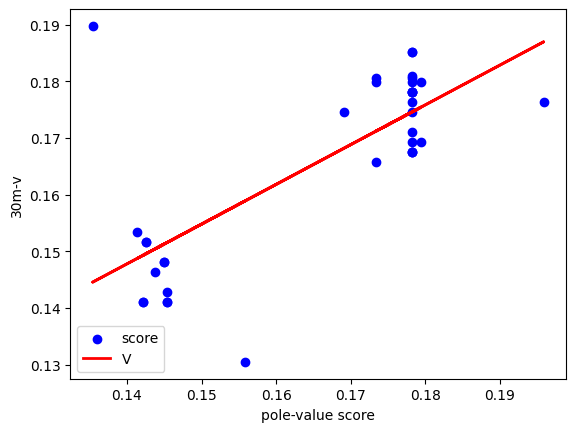

In [23]:
plt.scatter(x1,x2,color="blue",label="score")
plt.plot(x1,model.predict(x1),color="red",linewidth = 2,label = "V")
plt.xlabel("pole-value score")
plt.ylabel("30m-v")
plt.legend()
plt.show()